**Python 3 code for web scraping, data cleaning, and data saving into a CSV file. Melluso shoe brand.** 

In [2]:
#import the libraries I need
import pandas as pd
import requests
from bs4 import BeautifulSoup
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#URL of shoe brand: MELLUSO
url_melluso = "https://www.melluso.com/it/"
print(url_melluso)

https://www.melluso.com/it/


In [4]:
#I extract the shoe categories for women and men
spans = BeautifulSoup(requests.get(url_melluso).text).find_all("span")
spans_txt = []
for span in spans:
    spans_txt.append(span.text)

cat_donna = spans_txt[23:32]
cat_uomo = spans_txt[38:43]

In [8]:
print(cat_donna)

['Dècolletè', 'Sneakers', 'Mocassini', 'Stivaletti', 'Stivali', 'Tacchi bassi', 'Tacchi alti', 'Cerimonia', 'Pantofole']


In [10]:
print(cat_uomo)

['Mocassini Uomo', 'Classiche', 'Sneakers', 'Stivaletti', 'Pantofole']


In [12]:
#URL for women categories
url_donna = url_melluso + "melluso-donna/"
print(url_donna)

https://www.melluso.com/it/melluso-donna/


In [14]:
#URL for men categories
url_uomo = url_melluso + "uomo/"
print(url_uomo)

https://www.melluso.com/it/uomo/


In [16]:
#I need to modify some category names to match the URLs where I perform data scraping
for i in range(0, len(cat_donna)):
    cat_donna[i] = unidecode(cat_donna[i]).lower()

cat_donna[2] = "donna-mocassini"
cat_donna[4] = "melluso-donna-stivali-html"
cat_donna[5] = "tacchi-comodi"
cat_donna[6] = "tacchi-alti"

print(cat_donna)

['decollete', 'sneakers', 'donna-mocassini', 'stivaletti', 'melluso-donna-stivali-html', 'tacchi-comodi', 'tacchi-alti', 'cerimonia', 'pantofole']


In [18]:
#Same for men category names
for i in range(0, len(cat_uomo)):
    cat_uomo[i] = unidecode(cat_uomo[i]).lower()

cat_uomo[0] = "mocassini-uomo"

print(cat_uomo)

['mocassini-uomo', 'classiche', 'sneakers', 'stivaletti', 'pantofole']


In [20]:
sexx = ["donna", "uomo"]

In [32]:
#I create the Python lists where I will save the data I need (initialization)
stringhe = []
prodotti = []
sesso = []
categorie = []
sotto_categorie = []
colori = []
prezzi_fin = []
prezzi_ini = []
contatore = 0

In [34]:
#Web Scraping code:
#I create for loops over sex, shoe category, webpage per category, and product per webpage
for sex in sexx:
    if sex == "donna":
        cat_sex = cat_donna
        url_sex = url_donna
        num_max = 23
    else:
        cat_sex = cat_uomo
        url_sex = url_uomo
        num_max = 4
    #for sulle categorie
    for cat in cat_sex:
        #for sulle pagine web
        for i in range(1, num_max):
            url_cat = url_sex + cat + ".html?p=" + str(i)
            print(url_cat)
            testi = BeautifulSoup(requests.get(url_cat).text).find_all("a", class_="product-item-link")
            if len(testi) > 0:
                print("yes")
                for testo in testi:
                    contatore += 1
                    print(contatore)
                    print(testo.text)
                    #se prodotto e' gift card
                    if testo.text == "Melluso Gift Card Virtuale":
                        prodotto = "Gift Card"
                        categoria = ""
                        sotto_categoria = ""
                        colore = ""
                        prezzo_fin = 50.00
                        prezzo_ini = 50.00

                    #se prodotto e' una scarpa
                    else:
                        prodotto = testo.text.split(" ")[-1]
                        categoria = cat
                        sotto_categoria = testo.text.split(" ")[0]                   
                        colore = testo.text.split(" ")[-2]       
                        scarpa_soup = BeautifulSoup(requests.get(testo.get("href")).text)
                        
                        #prezzi
                        prezzi_tag = scarpa_soup.find("div", class_="price-box price-final_price")
                        if prezzi_tag is None:
                            prezzo_fin = np.NaN
                            prezzo_ini = np.NaN
                            
                        else:
                            final_price_long = prezzi_tag.find("span", attrs={"data-price-type": "finalPrice"})
                            prezzo_fin = final_price_long.text.split()[0].replace(",",".")
                            prezzo_fin = float(prezzo_fin)

                            ini_price_long = prezzi_tag.find("span", attrs={"data-price-type": "oldPrice"})
                            if ini_price_long is None:
                                prezzo_ini = prezzo_fin
                            else:
                                prezzo_ini = ini_price_long.text.split()[0].replace(",",".")
                                prezzo_ini = float(prezzo_ini)
                    
                    print("fin:", prezzo_fin)
                    print("ini:", prezzo_ini)

                    
                    stringhe.append(testo.text)
                    prodotti.append(prodotto)
                    sesso.append(sex)
                    categorie.append(categoria)
                    sotto_categorie.append(sotto_categoria)
                    colori.append(colore)    
                    prezzi_fin.append(prezzo_fin)
                    prezzi_ini.append(prezzo_ini)
            
            print("\n")

https://www.melluso.com/it/melluso-donna/decollete.html?p=1
yes
1
Melluso Gift Card Virtuale
fin: 50.0
ini: 50.0
2
Décolleté donna slingback in pelle nude e bianco e1690
fin: 149.9
ini: 149.9
3
Décolleté donna in pelle acero d5176w
fin: 104.93
ini: 149.9
4
Décolleté donna in camoscio zebra verde d5176w
fin: 111.93
ini: 159.9
5
Décolleté donna in camoscio zebra cioccolato d5176w
fin: 111.93
ini: 159.9
6
Décolleté donna in camoscio vino d5178w
fin: 73.45
ini: 149.9
7
Décolleté donna in camoscio petrolio d5185w
fin: 104.93
ini: 149.9
8
Décolleté donna in pelle nero d5185w
fin: 94.44
ini: 149.9
9
Décolleté donna in camoscio acero d5185w
fin: 94.44
ini: 149.9
10
Décolleté donna in camoscio rovere d5125w
fin: 97.93
ini: 139.9
11
Décolleté donna con cinturino in vernice nero d5126w
fin: 104.93
ini: 149.9


https://www.melluso.com/it/melluso-donna/decollete.html?p=2
yes
12
Décolleté donna con cinturino in camoscio rovere d5126w
fin: 97.93
ini: 139.9
13
Décolleté donna con cinturino in camoscio

In [36]:
#I verify the lenght of strings
print(len(prodotti))
print(len(prezzi_fin))

994
994


In [38]:
#I create a pandas dataframe
melluso_df = pd.DataFrame(
    {"Info": stringhe,
     "Nome": prodotti,
     "Sesso": sesso,
     "Categoria": categorie,
     "Sotto_categoria": sotto_categorie,
     "Colore": colori,
     "Prezzo_finale": prezzi_fin,
     "Prezzo_originale": prezzi_ini}
)

In [40]:
melluso_df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale
0,Melluso Gift Card Virtuale,Gift Card,donna,,,,50.00,50.0
1,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,Décolleté,bianco,149.90,149.9
2,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,Décolleté,acero,104.93,149.9
3,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,Décolleté,verde,111.93,159.9
4,Décolleté donna in camoscio zebra cioccolato d...,d5176w,donna,decollete,Décolleté,cioccolato,111.93,159.9
...,...,...,...,...,...,...,...,...
989,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,Pantofola,verde,34.93,49.9
990,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,Pantofola,grigio,31.50,45.0
991,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,Pantofola,blu,34.93,49.9
992,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,Pantofola,marrone,27.93,39.9


In [42]:
#I save the raw dataframe
melluso_df.to_csv("melluso.csv", index=None)

In [44]:
#I open the df again
df = pd.read_csv("melluso.csv")

In [46]:
df.Sotto_categoria.value_counts()

Sotto_categoria
Décolleté     373
Mocassino     219
Sneakers      118
Stivaletto    104
Pantofola      50
Tronchetto     48
Scarpa         31
Stivale        19
Dècolletè      10
Borsa           7
Sandalo         3
Name: count, dtype: int64

In [48]:
#I rename sub categories
df.Sotto_categoria = df.Sotto_categoria.str.replace("Décolleté","Decollete")
df.Sotto_categoria = df.Sotto_categoria.str.replace("Dècolletè","Decollete")

In [50]:
df.Sotto_categoria = df.Sotto_categoria.str.lower()

In [52]:
df.Sotto_categoria.value_counts()

Sotto_categoria
decollete     383
mocassino     219
sneakers      118
stivaletto    104
pantofola      50
tronchetto     48
scarpa         31
stivale        19
borsa           7
sandalo         3
Name: count, dtype: int64

In [54]:
df.Prezzo_originale.isna().sum()

5

In [60]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale
0,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0
1,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,149.90,149.9
2,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9
3,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9
4,Décolleté donna in camoscio zebra cioccolato d...,d5176w,donna,decollete,decollete,cioccolato,111.93,159.9
...,...,...,...,...,...,...,...,...
989,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,pantofola,verde,34.93,49.9
990,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,pantofola,grigio,31.50,45.0
991,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,pantofola,blu,34.93,49.9
992,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,pantofola,marrone,27.93,39.9


In [62]:
df["Sconto"] = ((df.Prezzo_originale - df.Prezzo_finale)/df.Prezzo_originale)*100

In [64]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto
0,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0
1,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,149.90,149.9,0.0
2,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0
3,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0
4,Décolleté donna in camoscio zebra cioccolato d...,d5176w,donna,decollete,decollete,cioccolato,111.93,159.9,30.0
...,...,...,...,...,...,...,...,...,...
989,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,pantofola,verde,34.93,49.9,30.0
990,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,pantofola,grigio,31.50,45.0,30.0
991,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,pantofola,blu,34.93,49.9,30.0
992,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,pantofola,marrone,27.93,39.9,30.0


In [66]:
df["Azienda"] = "Melluso"

In [68]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
0,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0,Melluso
1,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,149.90,149.9,0.0,Melluso
2,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0,Melluso
3,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0,Melluso
4,Décolleté donna in camoscio zebra cioccolato d...,d5176w,donna,decollete,decollete,cioccolato,111.93,159.9,30.0,Melluso
...,...,...,...,...,...,...,...,...,...,...
989,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,pantofola,verde,34.93,49.9,30.0,Melluso
990,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,pantofola,grigio,31.50,45.0,30.0,Melluso
991,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,pantofola,blu,34.93,49.9,30.0,Melluso
992,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,pantofola,marrone,27.93,39.9,30.0,Melluso


In [70]:
df.Categoria.value_counts()

Categoria
tacchi-comodi                 264
decollete                     184
donna-mocassini               102
stivaletti                     96
tacchi-alti                    85
sneakers                       77
cerimonia                      66
mocassini-uomo                 35
classiche                      30
pantofole                      28
melluso-donna-stivali-html     15
Name: count, dtype: int64

In [72]:
#I rename some categories
df.Categoria = df.Categoria.str.replace("donna-mocassini","mocassini")
df.Categoria = df.Categoria.str.replace("mocassini-uomo","mocassini")
df.Categoria = df.Categoria.str.replace("melluso-donna-stivali-html","stivali")

In [102]:
df.groupby("Categoria")["Azienda"].count()

Categoria
cerimonia         66
classiche         30
decollete        184
mocassini        137
pantofole         28
sneakers          77
stivaletti        96
stivali           15
tacchi-alti       85
tacchi-comodi    264
Name: Azienda, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'decollete'),
  Text(1, 0, 'sneakers'),
  Text(2, 0, 'mocassini'),
  Text(3, 0, 'stivaletti'),
  Text(4, 0, 'stivali'),
  Text(5, 0, 'tacchi-comodi'),
  Text(6, 0, 'tacchi-alti'),
  Text(7, 0, 'cerimonia'),
  Text(8, 0, 'pantofole'),
  Text(9, 0, 'classiche')])

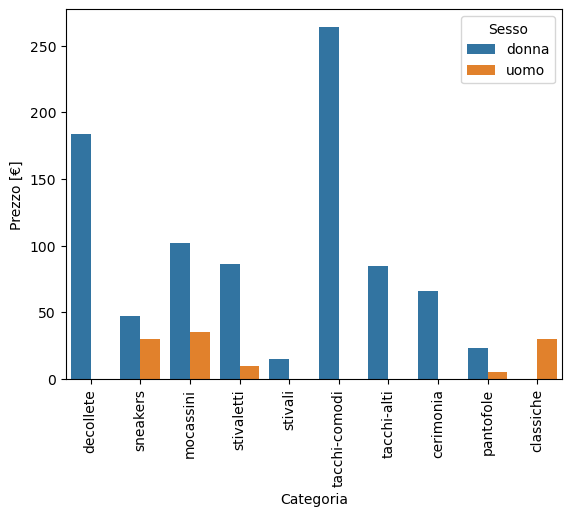

In [125]:
sns.countplot(data=df, x="Categoria", hue=df.Sesso) #, estimator="mean")
plt.ylabel("Prezzo [€]")
plt.xticks(rotation=90)

In [76]:
#I save the clean dataframe
df.to_csv("melluso_clean.csv", index=None)

In [ ]:
#Remember to rename categories